In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Set style for professional-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
df = pd.read_csv('../data/raw/application_train.csv')

In [5]:
df.shape

(307511, 122)

In [6]:
print("\nFirst 5 rows of TARGET column:")
display(df[['SK_ID_CURR', 'TARGET']].head())


First 5 rows of TARGET column:


,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0


In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# CHECK IMBALANCE

Legit Loans (0): 282686 (91.93%)
Defaulters (1):   24825 (8.07%)


C:\Users\Ronak Sumrani\AppData\Local\Temp\ipykernel_8228\3484862905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TARGET'], palette='viridis')


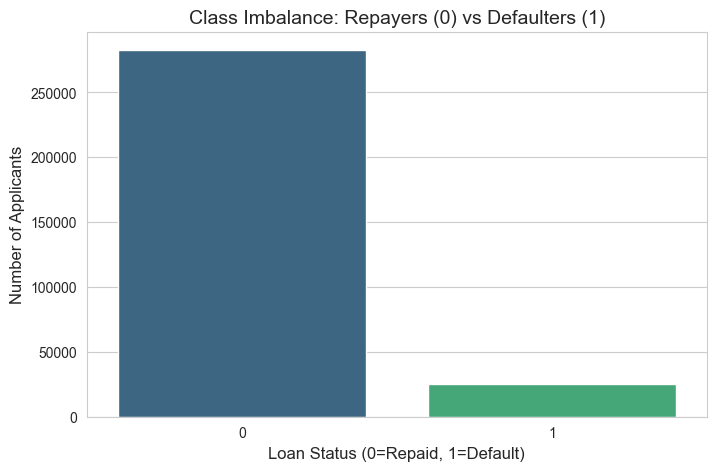

In [8]:
# Count how many 0s and 1s we have
target_counts = df['TARGET'].value_counts()
target_percent = df['TARGET'].value_counts(normalize=True) * 100

print(f"Legit Loans (0): {target_counts[0]} ({target_percent[0]:.2f}%)")
print(f"Defaulters (1):   {target_counts[1]} ({target_percent[1]:.2f}%)")

# PLOT IT
plt.figure(figsize=(8, 5))
sns.countplot(x=df['TARGET'], palette='viridis')
plt.title('Class Imbalance: Repayers (0) vs Defaulters (1)', fontsize=14)
plt.xlabel('Loan Status (0=Repaid, 1=Default)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.show()

The "Accuracy Trap" (Recruiter Interview Question)
This 8.07% figure is why beginners fail.

If you build a "dumb" model that just predicts 0 (Safe) for everyone, you will be right 92% of the time.

Metric: "92% Accuracy."

Reality: You missed 100% of the defaults. The bank went bankrupt.

Lesson: This is why we will never use "Accuracy" as our main metric. We will use ROC-AUC and Recall.